### Logistic Regression

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

#### Genearating data using numpy

In [253]:
# Using multivariate normal distribution

mean1 = np.array([1, 0.5])
cov1 = np.array([[1, 0.1], [0.1, 1.2]])

mean2 = np.array([4,5])
cov2 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

dist1.shape

(500, 2)

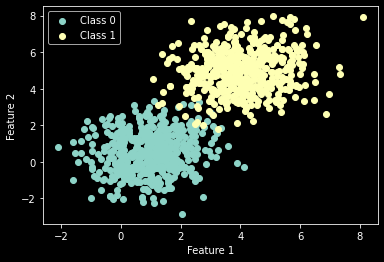

In [254]:
# Visualising
plt.scatter(dist1[:,0], dist1[:,1], label="Class 0")
plt.scatter(dist2[:,0], dist2[:,1], label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#### Creating a data matrix

In [255]:
data = np.zeros((1000,3)) # x1, x2, y

In [256]:
data[:500, :2] = dist1
data[500:, :2] = dist2

data[500:, -1] = 1

In [257]:
data[:5, :], data[-5:, :]

(array([[ 0.93722711,  3.00234462,  0.        ],
        [ 3.20664692,  1.56517719,  0.        ],
        [-0.90565116, -0.77661122,  0.        ],
        [-1.33366395,  1.16345112,  0.        ],
        [ 0.41893305,  0.52832571,  0.        ]]),
 array([[5.10919567, 5.83121763, 1.        ],
        [3.33870228, 5.34399946, 1.        ],
        [2.19860745, 4.82175785, 1.        ],
        [3.35135671, 5.68543564, 1.        ],
        [4.19069386, 4.9164278 , 1.        ]]))

This is our sample data, but it is ordered, now we shuffle

In [258]:
np.random.shuffle(data)
data[:10, :]

array([[ 4.15428259,  2.75872644,  1.        ],
       [ 1.87946181,  0.07455594,  0.        ],
       [ 0.91179407,  0.48118467,  0.        ],
       [ 1.01351145,  0.4076814 ,  0.        ],
       [ 2.49074654, -0.64151514,  0.        ],
       [ 4.10932885,  4.00322438,  1.        ],
       [ 3.09938364,  6.31955147,  1.        ],
       [ 0.22437397, -0.38026958,  0.        ],
       [ 3.44753143,  5.54717517,  1.        ],
       [ 2.48327147,  5.75749632,  1.        ]])

It is now shuffled

#### Splitting in test and train

In [259]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x_train.shape, y_test.shape

((800, 2), (200, 1))

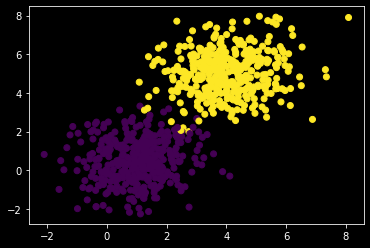

In [260]:
# Visualising the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

We see we have a well defined train data

#### Normalising data

In [261]:
x_train = (x_train - x_train.mean(axis=0))/x_train.std(axis=0)

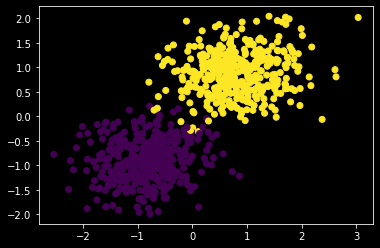

In [262]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

Now we see the entire data has centered around 0, but the points are still similar

In [263]:
# Similar transformation on x_test

x_test = (x_test - x_test.mean(axis=0))/x_test.std(axis=0)

### Implementing Logistic Regression

In [264]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

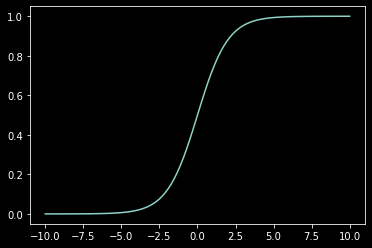

In [265]:
# Trying out the sigmoid function
a = np.linspace(-10, 10, 100)
plt.plot(a, sigmoid(a))
plt.show()

We get a nice sigmoid curve as showm, from 0 to 1

In [266]:
# Error function 
def error(X, y, theta):

    hi = hypothesis(X, theta)

    total_error = (y*np.log(hi)) + ((1-y)*(np.log(1 - hi)))

    return -1*np.mean(total_error)

In [267]:
def gradient(X, y, theta):

    hi = hypothesis(X, theta)
    grad = np.dot(X.T, y - hi)

    m = X.shape[0]
    return grad/m

def gradientDescent(X, y, lr = 0.1, max_steps = 500):
    
    m, n = X.shape
    theta = np.zeros((n,1))

    error_list = []

    for i in range(max_steps):

        err = error(X, y, theta)
        error_list.append(err)

        grad = gradient(X, y, theta)

        # Update
        theta = theta + lr * grad

    return theta, error_list


#### Preparing the data

In [268]:
ones = np.ones((x_train.shape[0], 1))
X_ = np.hstack((ones, x_train))

In [269]:
theta, error_list = gradientDescent(X_, y_train)

In [270]:
theta

array([[0.11465462],
       [2.12619675],
       [2.91932716]])

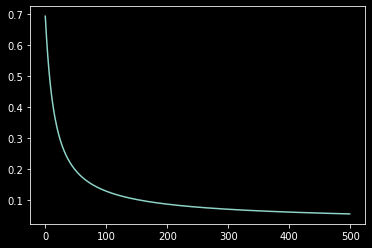

In [271]:
plt.plot(error_list)
plt.show()

#### Plotting the surface line

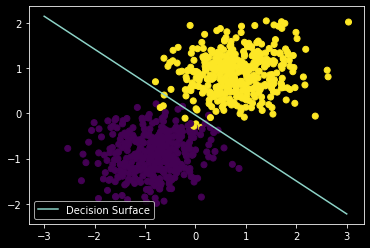

In [272]:
x1 = np.arange(-3,4)

x2 = -(theta[0] + theta[1]*x1)/theta[2]

plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)
plt.plot(x1, x2, label="Decision Surface")
plt.legend()
plt.show()

We see that our prediction is quite fine

### Prediction

In [273]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)

    output[h >= 0.5] = 1

    return output

In [274]:
ones = np.zeros((x_test.shape[0], 1))
x_ = np.hstack((ones, x_test))

In [275]:
predict(x_, theta)[:5, :]

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.]])

We are getting proper predictions

In [276]:
preds = predict(x_, theta)

In [277]:
def accuracy(actual, pred):
    actual = actual.astype('int')
    return np.sum(actual == pred)/actual.shape[0]

In [278]:
accuracy(y_test, preds)

0.98

We are getting 196 values out of 200 as correctly predicted